# **Assignment - House Price Data**


<p>By</p>
<p>Name -Lakshya Gazaresen</p>
<p>Student Number - 19251460</p>

<p>The aim of the report is to apply K-nearest neighbors Machine Learning Algorithm on house price dataset of London and visualize the price of the houses on different floor area such as 75 squared meter floor area, 125 squared floor area and also with the mean of the floor area.</p>

## **1.Importing the House Price Dataset**

In [1]:
#Importing numpy
import numpy as np
#Importing pandas
import pandas as pd

<p>Numpy package stands for Numerica Python as this package helps in carrying out scientific imputation, linear algebra etc. Whereas, Pandas package allows to compute multidimensional structured datasets. Using these packages the house price data can be imported from www.dropbox.com/s/2bfz210216dw6cw/hpdemo.csv?dl=0.</p>
<p>The data is printed as shown below.</p>

In [2]:
hp = pd.read_csv('hpdemo.csv')
print(hp)

        ID    east   north   price  fl_area
0        1  523800  179700  107000       50
1        2  533200  170900   55500       66
2        3  514600  175800  103000       90
3        4  516000  171000  187000      125
4        5  533700  169200   43000       50
...    ...     ...     ...     ...      ...
1400  1401  515600  173100   68500       44
1401  1402  513200  186500   58500       59
1402  1403  542900  189500  247000      185
1403  1404  524900  185300  153000       96
1404  1405  522000  185400  146250      111

[1405 rows x 5 columns]


The houseprice data consists of 5 variables:
- ID - An ID number of each house.
- east - The easting co-ordinate of the house.
- north - the northing co-ordinate of the house.
- price - The price of the house.
- fl_area - The floor area of the house.

## **2. Applying the K Nearest Neighbor Machine Learning Algorithm**

The first step to build a machine learning model is to scale the dataset, it is a step of data preprocessing. It helps to normalise the data within a particular range and helps in speeding up the calculations."sklearn" library is used to perform machine learning as it features various algorithms like support vector machine, k-neighbours and it also supports numpy. "StandardScaler" is a function of sklearn which produces a Python object that will perform the scaling for variables. We will be using pipelining technique to build the model.

In [3]:
from sklearn.preprocessing import StandardScaler

Importing KNeighborsRegressor function from the sub-package sklearn.neighbors, here being imported as NN, which is to produce the nearest neighbors regression objects.

In [4]:
from sklearn.neighbors import KNeighborsRegressor as NN
from sklearn.metrics import mean_absolute_error, make_scorer
mae = make_scorer(mean_absolute_error, greater_is_better=False)

The price in the dataset has to be divided by 1000 to avoid any rounding errors.

In [5]:
price = hp['price']/1000.0

The general model fitting algorithm involves rescaling the dataand then applying the ML algorithm which leads to prediction of house price data.This can be achieved through pipeline. The aim is to get the pipeline object work like a regression model i.e, to fit and predict. Pipeline avoids manually rescaling the data before making the predictions as pipeline consists the whole process including rescaling, fitting the model and then predicting the model.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

With the help of GridSearchCV, the parameters of the estimator is optimized by cross-validated grid search over a parameter grid.
The estimator specifies the machine learning algorithm, in our case pipe. The scoring is based on mean_absolute error. It carries out the full cross-validation search instead of any pre-specified tuning of parameters.
Each block of pipeline must have a fit method while the last block is used as transform method.

In [7]:
pipe = Pipeline([('zscores',StandardScaler()),('NNreg',NN())])

opt_nn = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,35),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2]})

Predicting the model for a easting of 523800 and northing  of 179750 of London with the floor area of 55 square meters, the predicted house price is of 122.535, which have been computed by the model as follows:

In [8]:
opt_nn.fit(hp[['east','north','fl_area']],price)
print(opt_nn.predict([[523800.0,179750.0,55.0]]))

[122.53520623]


In [9]:
def print_summary2(opt_pipe_object):
    params = opt_pipe_object.best_estimator_.get_params()
    score = - opt_pipe_object.best_score_
    print("Nearest neighbours: %8d" % params['NNreg__n_neighbors'])
    print("Minkowski p       : %8d" % params['NNreg__p'])
    print("Weighting         : %8s" % params['NNreg__weights'])
    print("MAE Score         : %8.2f" % score)
    return

In [10]:
print_summary2(opt_nn)

Nearest neighbours:       16
Minkowski p       :        1
Weighting         : distance
MAE Score         :    26.42


Therefore, from the model, there are 16 nearest neighbors with the mean absolute error of 26.42

## 3. Output Visualisation 

Visualising the outcomes makes it easier to understand the model based on the dataset. The model can be visualised to predict the house prices at differnt floor areas.The outcomes will be visualised in 3D plots using mpl_toolkits. To achieve the 3D plots, grids has to be created of 100 by 100 points.Using meshgrid, area for the dataset's easting and northing and floor_area will be generated

In [11]:
east_mesh, north_mesh = np.meshgrid(np.linspace(
        505000,555800,100),np.linspace(158400,199900,100))
fl_mesh = np.zeros_like(east_mesh)
fl_mesh[:,:] = np.mean(hp['fl_area'])

To compute the grids for floor_area, average level has to be used. np.zeros creates an array of the same size but it contains zeros,further which, every element is assigned with average floor size. For the prediction, each variable should be unravelled into single dimension using "ravel" method.

In [12]:
grid_predictor_vars = np.array([east_mesh.ravel(),
    north_mesh.ravel(),fl_mesh.ravel()]).T 

Now the predict method has been used. Although, hp_pred has to be reshaped to be in grid format which is achieved uing reshape method. Here hp_pred is reshaped to have the same dimension as east_mesh and is stored in a new array called hp_mesh.

In [13]:
hp_pred = opt_nn.predict(grid_predictor_vars)

In [14]:
hp_mesh = hp_pred.reshape(east_mesh.shape)

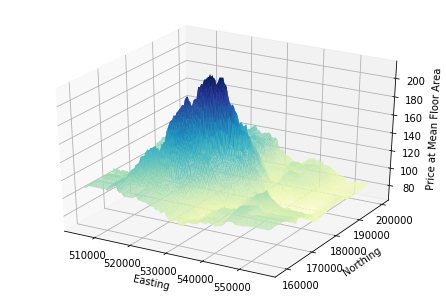

In [15]:
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure()
ax = Axes3D(fig)
ax.plot_surface(east_mesh, north_mesh, hp_mesh, rstride=1, cstride=1, cmap='YlGnBu',lw=0.01)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Price at Mean Floor Area')
pl.show()

The above plot provides the house prices at "mean floor area". It can be observed that the price peaks around 170. The average price ranges between 110 to 150.

In [16]:
def surf3d(pipe_model,fl_area):
    east_mesh, north_mesh = np.meshgrid(
        np.linspace(505000,555800,100),
        np.linspace(158400,199900,100))
    fl_mesh = np.zeros_like(east_mesh)
    fl_mesh[:,:] = fl_area
    grid_predictor_vars = np.array([east_mesh.ravel(),
        north_mesh.ravel(),fl_mesh.ravel()]).T
    hp_pred = pipe_model.predict(grid_predictor_vars)
    hp_mesh = hp_pred.reshape(east_mesh.shape)
    fig = pl.figure()
    ax = Axes3D(fig)
    ax.plot_surface(east_mesh, north_mesh, hp_mesh, 
        rstride=1, cstride=1, cmap='YlGnBu',lw=0.01)
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Price at '+ str(fl_area) +' sq mtr Floor Area')
    pl.show()
    return

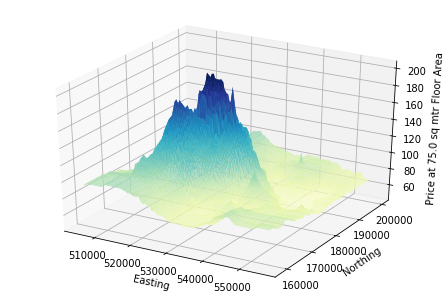

In [17]:
pl.close()
surf3d(opt_nn,75.0)
pl.show()

The above plot describes the model at 75 sqaure meters of floor_area. The plot is similar to the plot with mean floor area. The peak of the price is close to 160. Most of the price ranges between 100 to 150.

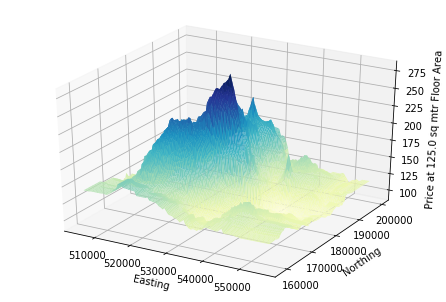

In [18]:
pl.close()
surf3d(opt_nn,125.0)
pl.show()

The above plot describes the model at 125 square meters of floor area. The peak price is above 225. Most of the houses are in the price range of 170 to 200.

Hence, using K nearst neighbor machine learning algorithm the prediction of house prices at different floor_area can be analysed and visualised using 3D plots.